In [3]:
import pandas as pd


In [4]:
from google.colab import files
uploaded = files.upload()

Saving VeriSeti.csv to VeriSeti.csv


In [6]:
data = pd.read_csv("VeriSeti.csv")
print(data.head())

   Set No               Sentence 1 (Similar)             Sentence 2 (Similar)  \
0       1         1. set: Ahmet yemek yiyor.  1. set: Ahmet yemek hazırlıyor.   
1       2          2. set: Ayşe yemek yiyor.   2. set: Ayşe yemek hazırlıyor.   
2       3   3. set: Köpek bahçede dolaşıyor.   3. set: Köpek bahçede oynuyor.   
3       4  4. set: Köpek televizyon izliyor.      4. set: Köpek film izliyor.   
4       5   5. set: Araba bahçede dolaşıyor.   5. set: Araba bahçede oynuyor.   

                Sentence 3 (Different)  
0       1. set: Ahmet denizde yüzüyor.  
1  2. set: Ayşe sinemada film izliyor.  
2       3. set: Köpek denizde yüzüyor.  
3          4. set: Köpek kahve içiyor.  
4    5. set: Araba dağda kamp yapıyor.  


In [7]:
# Gerekli sütunları işleyelim (cümleler üzerinde çalışmak için):
sentences = []
for index, row in data.iterrows():
    sentences.append({
        "set_no": row["Set No"],
        "sentence1": row["Sentence 1 (Similar)"],
        "sentence2": row["Sentence 2 (Similar)"],
        "sentence3": row["Sentence 3 (Different)"]
    })


In [8]:
# Cümleleri işleyip liste yapısında görüntüleyelim
for item in sentences:
    print(item)

{'set_no': 1, 'sentence1': '1. set: Ahmet yemek yiyor.', 'sentence2': '1. set: Ahmet yemek hazırlıyor.', 'sentence3': '1. set: Ahmet denizde yüzüyor.'}
{'set_no': 2, 'sentence1': '2. set: Ayşe yemek yiyor.', 'sentence2': '2. set: Ayşe yemek hazırlıyor.', 'sentence3': '2. set: Ayşe sinemada film izliyor.'}
{'set_no': 3, 'sentence1': '3. set: Köpek bahçede dolaşıyor.', 'sentence2': '3. set: Köpek bahçede oynuyor.', 'sentence3': '3. set: Köpek denizde yüzüyor.'}
{'set_no': 4, 'sentence1': '4. set: Köpek televizyon izliyor.', 'sentence2': '4. set: Köpek film izliyor.', 'sentence3': '4. set: Köpek kahve içiyor.'}
{'set_no': 5, 'sentence1': '5. set: Araba bahçede dolaşıyor.', 'sentence2': '5. set: Araba bahçede oynuyor.', 'sentence3': '5. set: Araba dağda kamp yapıyor.'}
{'set_no': 6, 'sentence1': '6. set: Ayşe masanın üstünde oturuyor.', 'sentence2': '6. set (benzer): Ayşe masanın üstünde oturuyor.', 'sentence3': '6. set: Ayşe dağda kamp yapıyor.'}
{'set_no': 7, 'sentence1': '7. set: Ahmet 

In [9]:
!pip install transformers
!pip install sentence-transformers

In [10]:
from transformers import AutoTokenizer, AutoModel
from sentence_transformers import SentenceTransformer

In [11]:
# 1. BERT modelini yükle
bert_model_name = "bert-base-uncased"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_model_name)
bert_model = AutoModel.from_pretrained(bert_model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [12]:
# 2. Sentence-BERT modelini yükle
sbert_model_name = "sentence-transformers/all-MiniLM-L6-v2"
sbert_model = SentenceTransformer(sbert_model_name)

print("Modeller başarıyla yüklendi!")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Modeller başarıyla yüklendi!


In [13]:
# Cosine similarity hesaplaması için gerekli kütüphaneyi yükleyin
from sklearn.metrics.pairwise import cosine_similarity
import torch

In [14]:
# Test için bir cümle
test_sentence = "Ahmet yemek yiyor."

# Tokenize edelim
inputs = bert_tokenizer(test_sentence, return_tensors="pt")

# BERT ile çıktıları alalım
outputs = bert_model(**inputs)
cls_embedding = outputs.last_hidden_state[:, 0, :]  # CLS token embedding
print("CLS token embedding:", cls_embedding.shape)

CLS token embedding: torch.Size([1, 768])


In [15]:
# Sentence-BERT ile embedding çıkarma
sbert_embedding = sbert_model.encode(test_sentence)
print("Sentence-BERT embedding:", sbert_embedding.shape)

Sentence-BERT embedding: (384,)


In [16]:
# Cosine similarity hesaplamak için bir fonksiyon
def calculate_cosine_similarity(embedding1, embedding2):
    return cosine_similarity(embedding1.detach().numpy(), embedding2.detach().numpy())[0][0]

# BERT ile `[CLS]` token embedding'lerini çıkarma ve benzerlik hesaplama
def bert_cls_similarity(sentence1, sentence2):
    # Cümleleri tokenize edelim
    inputs1 = bert_tokenizer(sentence1, return_tensors="pt")
    inputs2 = bert_tokenizer(sentence2, return_tensors="pt")

    # Model çıktıları
    outputs1 = bert_model(**inputs1)
    outputs2 = bert_model(**inputs2)

    # CLS token embedding'leri
    cls_embedding1 = outputs1.last_hidden_state[:, 0, :]  # CLS token
    cls_embedding2 = outputs2.last_hidden_state[:, 0, :]

    # Cosine similarity
    similarity = calculate_cosine_similarity(cls_embedding1, cls_embedding2)
    return similarity

# Örnek olarak ilk seti kullanalım
example = sentences[0]
similarity_score = bert_cls_similarity(example["sentence1"], example["sentence2"])
print("BERT [CLS] Similarity (Sentence 1 & 2):", similarity_score)


BERT [CLS] Similarity (Sentence 1 & 2): 0.93080395


In [17]:
# Pooled (mean) embedding ile benzerlik hesaplama
def bert_mean_pooling_similarity(sentence1, sentence2):
    # Cümleleri tokenize edelim
    inputs1 = bert_tokenizer(sentence1, return_tensors="pt")
    inputs2 = bert_tokenizer(sentence2, return_tensors="pt")

    # Model çıktıları
    outputs1 = bert_model(**inputs1)
    outputs2 = bert_model(**inputs2)

    # Mean pooling
    mean_embedding1 = outputs1.last_hidden_state.mean(dim=1)  # Ortalama al
    mean_embedding2 = outputs2.last_hidden_state.mean(dim=1)

    # Cosine similarity
    similarity = calculate_cosine_similarity(mean_embedding1, mean_embedding2)
    return similarity

# Örnek olarak ilk seti kullanalım
similarity_score = bert_mean_pooling_similarity(example["sentence1"], example["sentence2"])
print("BERT Mean Pooling Similarity (Sentence 1 & 2):", similarity_score)


BERT Mean Pooling Similarity (Sentence 1 & 2): 0.78099716


In [18]:
# Sentence-BERT ile benzerlik hesaplama
def sbert_similarity(sentence1, sentence2):
    embedding1 = sbert_model.encode(sentence1).reshape(1, -1)
    embedding2 = sbert_model.encode(sentence2).reshape(1, -1)

    # Cosine similarity
    similarity = cosine_similarity(embedding1, embedding2)[0][0]
    return similarity

# Örnek olarak ilk seti kullanalım
similarity_score = sbert_similarity(example["sentence1"], example["sentence2"])
print("Sentence-BERT Similarity (Sentence 1 & 2):", similarity_score)


Sentence-BERT Similarity (Sentence 1 & 2): 0.8142965


In [19]:
# Tüm setler için skor hesaplama
results = []
for item in sentences:
    result = {
        "set_no": item["set_no"],
        "bert_cls_similarity": bert_cls_similarity(item["sentence1"], item["sentence2"]),
        "bert_mean_similarity": bert_mean_pooling_similarity(item["sentence1"], item["sentence2"]),
        "sbert_similarity": sbert_similarity(item["sentence1"], item["sentence2"]),
    }
    results.append(result)

# Sonuçları bir dataframe olarak görelim
results_df = pd.DataFrame(results)
print(results_df)


    set_no  bert_cls_similarity  bert_mean_similarity  sbert_similarity
0        1             0.930804              0.780997          0.814296
1        2             0.963787              0.888703          0.802889
2        3             0.969562              0.878328          0.799557
3        4             0.937618              0.930806          0.797759
4        5             0.973957              0.883706          0.863929
5        6             0.966883              0.986193          0.883038
6        7             0.981005              0.941815          0.790899
7        8             0.966058              0.873418          0.810451
8        9             0.958688              0.881671          0.807133
9       10             0.974245              0.987468          0.907125
10      11             0.965318              0.985376          0.913271
11      12             0.970919              0.942266          0.879852
12      13             0.967857              0.899537          0

In [21]:
# Tüm cümle çiftleri için benzerlik skorlarını hesaplama
def calculate_all_similarities():
    all_results = []
    for item in sentences:
        result = {
            "set_no": item["set_no"],
            "cls_sim_1_2": bert_cls_similarity(item["sentence1"], item["sentence2"]),
            "cls_sim_1_3": bert_cls_similarity(item["sentence1"], item["sentence3"]),
            "cls_sim_2_3": bert_cls_similarity(item["sentence2"], item["sentence3"]),
            "mean_sim_1_2": bert_mean_pooling_similarity(item["sentence1"], item["sentence2"]),
            "mean_sim_1_3": bert_mean_pooling_similarity(item["sentence1"], item["sentence3"]),
            "mean_sim_2_3": bert_mean_pooling_similarity(item["sentence2"], item["sentence3"]),
            "sbert_sim_1_2": sbert_similarity(item["sentence1"], item["sentence2"]),
            "sbert_sim_1_3": sbert_similarity(item["sentence1"], item["sentence3"]),
            "sbert_sim_2_3": sbert_similarity(item["sentence2"], item["sentence3"]),
        }
        all_results.append(result)

    # Sonuçları bir dataframe'e dönüştür
    return pd.DataFrame(all_results)

# Benzerlik sonuçlarını hesaplayalım
similarity_results_df = calculate_all_similarities()

# Sonuçları bir DataFrame olarak ekranda göster
from IPython.display import display
display(similarity_results_df)



,set_no,cls_sim_1_2,cls_sim_1_3,cls_sim_2_3,mean_sim_1_2,mean_sim_1_3,mean_sim_2_3,sbert_sim_1_2,sbert_sim_1_3,sbert_sim_2_3
0,1,0.930804,0.961999,0.970470,0.780997,0.868165,0.914753,0.814296,0.689499,0.688644
1,2,0.963787,0.906083,0.939132,0.888703,0.891726,0.918490,0.802889,0.700505,0.631471
2,3,0.969562,0.958949,0.964130,0.878328,0.872108,0.902608,0.799557,0.725145,0.755422
3,4,0.937618,0.873422,0.893336,0.930806,0.800584,0.846096,0.797759,0.762705,0.718284
4,5,0.973957,0.985300,0.958394,0.883706,0.966226,0.845889,0.863929,0.911132,0.779778
5,6,0.966883,0.984666,0.955034,0.986193,0.968462,0.952284,0.883038,0.865251,0.740216
6,7,0.981005,0.937154,0.953094,0.941815,0.803613,0.895905,0.790899,0.775374,0.769048
7,8,0.966058,0.923829,0.949319,0.873418,0.756740,0.855228,0.810451,0.719826,0.825167
8,9,0.958688,0.976529,0.951239,0.881671,0.927397,0.843624,0.807133,0.768157,0.766674
9,10,0.974245,0.973429,0.954739,0.987468,0.961896,0.950918,0.907125,0.873015,0.827685


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GENEL YORUMLAR

In [22]:
# Ortalama skorları hesaplama
average_scores = {
    "BERT [CLS] (1-2)": similarity_results_df["cls_sim_1_2"].mean(),
    "BERT [CLS] (1-3)": similarity_results_df["cls_sim_1_3"].mean(),
    "BERT [CLS] (2-3)": similarity_results_df["cls_sim_2_3"].mean(),
    "BERT Mean (1-2)": similarity_results_df["mean_sim_1_2"].mean(),
    "BERT Mean (1-3)": similarity_results_df["mean_sim_1_3"].mean(),
    "BERT Mean (2-3)": similarity_results_df["mean_sim_2_3"].mean(),
    "Sentence-BERT (1-2)": similarity_results_df["sbert_sim_1_2"].mean(),
    "Sentence-BERT (1-3)": similarity_results_df["sbert_sim_1_3"].mean(),
    "Sentence-BERT (2-3)": similarity_results_df["sbert_sim_2_3"].mean(),
}

# Ortalama skorları görüntüleme
for method, score in average_scores.items():
    print(f"{method}: {score:.4f}")


BERT [CLS] (1-2): 0.9532
BERT [CLS] (1-3): 0.9387
BERT [CLS] (2-3): 0.9374
BERT Mean (1-2): 0.9134
BERT Mean (1-3): 0.8753
BERT Mean (2-3): 0.8880
Sentence-BERT (1-2): 0.8634
Sentence-BERT (1-3): 0.7840
Sentence-BERT (2-3): 0.7588


BERT CLS yöntemi, benzer cümle çiftleri için en yüksek ortalama skoru sağlıyor (0.9532). Bu, CLS in anlam bakımından en güçlüsü anlamına geliyor.

BERT Mean Pooling biraz daha düşük (0.9134), ancak hala iyi bir performans sunuyor.

Sentence-BERT, bu cümle çiftlerinde diğer yöntemlere göre daha düşük bir skor sağlıyor (0.8634).

Sentence-BERT, farklı cümle çiftleri için en düşük skora sahip (0.7840 ve 0.7588) bu da farklılıkları en iyi şekilde yakalayabildiğini gösterir.

Bert CLS ve Bert Mean Pooling farklı cümle çiftleri için daha yüksek skor gösteriyor. Bu da benzerlik ve farklılıklar arasında az ayrım yapabildiği anlamına gelir.

In [23]:
# Skor farklarını hesaplama
score_differences = {
    "BERT [CLS]": average_scores["BERT [CLS] (1-2)"] - max(average_scores["BERT [CLS] (1-3)"], average_scores["BERT [CLS] (2-3)"]),
    "BERT Mean": average_scores["BERT Mean (1-2)"] - max(average_scores["BERT Mean (1-3)"], average_scores["BERT Mean (2-3)"]),
    "Sentence-BERT": average_scores["Sentence-BERT (1-2)"] - max(average_scores["Sentence-BERT (1-3)"], average_scores["Sentence-BERT (2-3)"]),
}

# Farkları görüntüleme
for method, diff in score_differences.items():
    print(f"{method} Fark: {diff:.4f}")


BERT [CLS] Fark: 0.0145
BERT Mean Fark: 0.0254
Sentence-BERT Fark: 0.0794


Sentence-BERT, benzer (1-2) ve farklı (1-3, 2-3) cümle çiftleri arasında en büyük farkı sağlıyor (0.0794). Bu, benzer ve farklı cümle çiftlerini daha iyi ayırt ettiğini gösteriyor.

BERT CLS yöntemi ise benzerlik skorları arasında oldukça küçük bir fark yaratıyor (0.0145). Bu, yöntemin benzerlik ve farklılık ayrımında diğer yöntemlere göre daha az başarılı olduğunu gösteriyor.

BERT Mean Pooling, performans açısından ortada yer alıyor (0.0254). Bu yöntem, BERT CLS e göre biraz daha iyi ayrım sağlıyor.

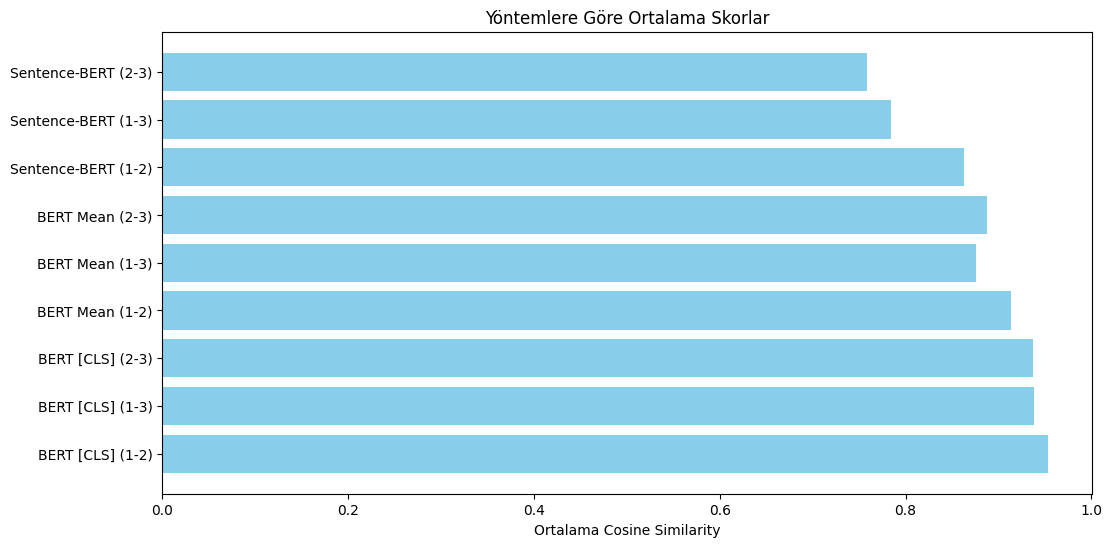

In [24]:
import matplotlib.pyplot as plt

# Yöntemlere göre ortalama skorları görselleştirme
methods = list(average_scores.keys())
scores = list(average_scores.values())

plt.figure(figsize=(12, 6))
plt.barh(methods, scores, color="skyblue")
plt.xlabel("Ortalama Cosine Similarity")
plt.title("Yöntemlere Göre Ortalama Skorlar")
plt.show()


En yüksek benzerlik (1-2) de en yüksek performans sağlayan -> BERT CLS yöntemi

Farklı cümle çiftlerinde (1-3, 2-3) farklılıkları en iyi şekilde yakalamada en yüksek performansı sağlayan -> Sentence BERT

Benzer ve farklı çiftler arasındaki en iyi ayrımı yapan -> Sentence BERT

Sonuç olarak ben benzer cümleler arasında en yüksek benzerlik oranı belirlemek istersem Bert CLS i seçerim

Farklılıkları belirgin bir şekilde görmek istersem Sentence Bert i seçerim